# Mushroom Classification - Data Understanding & Exploratory Data Analysis

## 1. Dataset Overview

### Problem Statement
The goal of this project is to **predict whether a mushroom is edible or poisonous** based on its physical characteristics. This is a binary classification problem with significant real-world implications, as misclassification could lead to serious health consequences.

### Dataset Description
- **Source**: UCI Machine Learning Repository - Mushroom Dataset (Agaricus and Lepiota Family)
- **Size**: 8,124 instances
- **Features**: 22 categorical features describing physical characteristics
- **Target Variable**: `class` - Binary classification (edible vs poisonous)
- **Data Type**: All features are categorical (nominal scale)

### Target Variable
- **class**: Mushroom edibility
  - `e` = edible
  - `p` = poisonous
  - **Measurement Level**: Nominal (categorical, no inherent order)
  - **Data Type**: Object (string)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df_mushrooms = pd.read_csv("mushroom-dataset/agaricus-lepiota.data", header=None)

column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

df_mushrooms.columns = column_names

print(f"Dataset Shape: {df_mushrooms.shape}")
print(f"Number of Features: {df_mushrooms.shape[1] - 1}")
print(f"Number of Samples: {df_mushrooms.shape[0]}")

Dataset Shape: (8124, 23)
Number of Features: 22
Number of Samples: 8124


## 2. Feature Descriptions

Below is a comprehensive description of all 22 predictor variables:

### Cap Features (Physical appearance of mushroom cap)
1. **cap-shape**: Shape of the mushroom cap
   - Values: bell (b), conical (c), convex (x), flat (f), knobbed (k), sunken (s)
   - Measurement Level: Nominal
   - Data Type: Object

2. **cap-surface**: Surface texture of the cap
   - Values: fibrous (f), grooves (g), scaly (y), smooth (s)
   - Measurement Level: Nominal
   - Data Type: Object

3. **cap-color**: Color of the cap
   - Values: brown (n), buff (b), cinnamon (c), gray (g), green (r), pink (p), purple (u), red (e), white (w), yellow (y)
   - Measurement Level: Nominal
   - Data Type: Object

### Physical Attributes
4. **bruises**: Whether the mushroom bruises when touched
   - Values: bruises (t), no bruises (f)
   - Measurement Level: Nominal (Binary)
   - Data Type: Object

5. **odor**: Smell of the mushroom
   - Values: almond (a), anise (l), creosote (c), fishy (y), foul (f), musty (m), none (n), pungent (p), spicy (s)
   - Measurement Level: Nominal
   - Data Type: Object

### Gill Features (Underside of cap)
6. **gill-attachment**: How gills attach to the stalk
   - Values: attached (a), descending (d), free (f), notched (n)
   - Measurement Level: Nominal
   - Data Type: Object

7. **gill-spacing**: Spacing between gills
   - Values: close (c), crowded (w), distant (d)
   - Measurement Level: Nominal
   - Data Type: Object

8. **gill-size**: Size of gills
   - Values: broad (b), narrow (n)
   - Measurement Level: Nominal (Binary)
   - Data Type: Object

9. **gill-color**: Color of gills
   - Values: black (k), brown (n), buff (b), chocolate (h), gray (g), green (r), orange (o), pink (p), purple (u), red (e), white (w), yellow (y)
   - Measurement Level: Nominal
   - Data Type: Object

### Stalk Features (Stem of mushroom)
10. **stalk-shape**: Shape of the stalk
    - Values: enlarging (e), tapering (t)
    - Measurement Level: Nominal (Binary)
    - Data Type: Object

11. **stalk-root**: Type of root
    - Values: bulbous (b), club (c), cup (u), equal (e), rhizomorphs (z), rooted (r), missing (?)
    - Measurement Level: Nominal
    - Data Type: Object
    - **Note**: Contains missing values (~30% of data)

12-13. **stalk-surface-above-ring / stalk-surface-below-ring**: Surface texture above/below the ring
    - Values: fibrous (f), scaly (y), silky (k), smooth (s)
    - Measurement Level: Nominal
    - Data Type: Object

14-15. **stalk-color-above-ring / stalk-color-below-ring**: Color above/below the ring
    - Values: brown (n), buff (b), cinnamon (c), gray (g), orange (o), pink (p), red (e), white (w), yellow (y)
    - Measurement Level: Nominal
    - Data Type: Object

### Veil Features (Protective covering)
16. **veil-type**: Type of veil
    - Values: partial (p), universal (u)
    - Measurement Level: Nominal
    - Data Type: Object
    - **Note**: In this dataset, all values are 'p' (no variance)

17. **veil-color**: Color of veil
    - Values: brown (n), orange (o), white (w), yellow (y)
    - Measurement Level: Nominal
    - Data Type: Object

### Ring Features (Remnant of veil)
18. **ring-number**: Number of rings
    - Values: none (n), one (o), two (t)
    - Measurement Level: Ordinal (has order: none < one < two)
    - Data Type: Object

19. **ring-type**: Type of ring
    - Values: cobwebby (c), evanescent (e), flaring (f), large (l), none (n), pendant (p), sheathing (s), zone (z)
    - Measurement Level: Nominal
    - Data Type: Object

### Environmental Features
20. **spore-print-color**: Color of spore print
    - Values: black (k), brown (n), buff (b), chocolate (h), green (r), orange (o), purple (u), white (w), yellow (y)
    - Measurement Level: Nominal
    - Data Type: Object

21. **population**: How mushrooms grow
    - Values: abundant (a), clustered (c), numerous (n), scattered (s), several (v), solitary (y)
    - Measurement Level: Nominal
    - Data Type: Object

22. **habitat**: Where mushroom grows
    - Values: grasses (g), leaves (l), meadows (m), paths (p), urban (u), waste (w), woods (d)
    - Measurement Level: Nominal
    - Data Type: Object

In [3]:
print("\nFirst 5 rows of the dataset:")
df_mushrooms.head()


First 5 rows of the dataset:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


All features are categorical (object type), which is expected for this dataset.

In [4]:
print("\nData Types:")
print(df_mushrooms.dtypes)


Data Types:
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


## 3. Data Quality Assessment

### 3.1 Missing Values Analysis

In [5]:
missing_values = df_mushrooms.isnull().sum()
missing_percent = (missing_values / len(df_mushrooms)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

print("\n'?' as Missing Value Indicator:")
for col in df_mushrooms.columns:
    question_marks = (df_mushrooms[col] == '?').sum()
    if question_marks > 0:
        pct = (question_marks / len(df_mushrooms)) * 100
        print(f"{col}: {question_marks} ({pct:.2f}%)")

Missing Values Summary:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

'?' as Missing Value Indicator:
stalk-root: 2480 (30.53%)


### Impact on Later Steps:
- **stalk-root** has ~30% missing values, which is significant
- **Options for handling**:
  1. **Imputation**: Fill with mode (most common value) - Risk: may introduce bias if missing values are not random
  2. **Create missing indicator**: Add binary feature indicating missingness - Preserves information about which records had missing values
  3. **Drop feature**: Only if missingness is too high or feature shows low importance
  4. **Drop records**: Only viable if <5% missing - Not suitable here due to 30% missingness
- **Decision**: We'll handle this in preprocessing pipeline with imputation, fitting only on training data to avoid data leakage

### 3.2 Number of Unique Values

Understanding the number of unique values helps us:
- Identify features with low variance (e.g., all same value)
- Plan encoding strategy (binary vs multi-class)
- Detect potential data quality issues

In [6]:
unique_counts = df_mushrooms.nunique().sort_values(ascending=False)

print("Number of Unique Values per Feature:")
print(unique_counts)

binary_features = unique_counts[unique_counts == 2].index.tolist()
print(f"\nBinary Features (2 unique values): {binary_features}")

single_value = unique_counts[unique_counts == 1].index.tolist()
if single_value:
    print(f"\nFeatures with No Variance (1 unique value): {single_value}")

Number of Unique Values per Feature:
gill-color                  12
cap-color                   10
spore-print-color            9
odor                         9
stalk-color-below-ring       9
stalk-color-above-ring       9
habitat                      7
cap-shape                    6
population                   6
ring-type                    5
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
veil-color                   4
cap-surface                  4
ring-number                  3
stalk-shape                  2
gill-size                    2
gill-spacing                 2
gill-attachment              2
bruises                      2
class                        2
veil-type                    1
dtype: int64

Binary Features (2 unique values): ['stalk-shape', 'gill-size', 'gill-spacing', 'gill-attachment', 'bruises', 'class']

Features with No Variance (1 unique value): ['veil-type']


### 3.3 Rare Categories (Categorical Outliers)

Categories that appear very rarely can be problematic:
- May not appear in test set, causing encoding issues
- Insufficient samples for model to learn patterns
- Can lead to overfitting on rare categories

In [12]:
threshold = 0.01 * len(df_mushrooms)

print("Rare Categories (appearing in <1% of samples):\n")
rare_categories_found = False

for col in df_mushrooms.columns:
    value_counts = df_mushrooms[col].value_counts()
    rare = value_counts[value_counts < threshold]
    if len(rare) > 0:
        rare_categories_found = True
        print(f"\n{col}:")
        for val, count in rare.items():
            pct = (count / len(df_mushrooms)) * 100
            print(f"  '{val}': {count} samples ({pct:.2f}%)")

if not rare_categories_found:
    print("No rare categories found (all categories appear in >1% of samples)")

Rare Categories (appearing in <1% of samples):


cap-shape:
  's': 32 samples (0.39%)
  'c': 4 samples (0.05%)

cap-surface:
  'g': 4 samples (0.05%)

cap-color:
  'c': 44 samples (0.54%)
  'u': 16 samples (0.20%)
  'r': 16 samples (0.20%)

odor:
  'm': 36 samples (0.44%)

gill-color:
  'o': 64 samples (0.79%)
  'r': 24 samples (0.30%)

stalk-surface-above-ring:
  'y': 24 samples (0.30%)

stalk-color-above-ring:
  'c': 36 samples (0.44%)
  'y': 8 samples (0.10%)

stalk-color-below-ring:
  'c': 36 samples (0.44%)
  'y': 24 samples (0.30%)

veil-color:
  'y': 8 samples (0.10%)

ring-number:
  'n': 36 samples (0.44%)

ring-type:
  'f': 48 samples (0.59%)
  'n': 36 samples (0.44%)

spore-print-color:
  'r': 72 samples (0.89%)
  'u': 48 samples (0.59%)
  'o': 48 samples (0.59%)
  'y': 48 samples (0.59%)
  'b': 48 samples (0.59%)


Rare categories will be handled during preprocessing by:
1. Grouping into 'other' category, or
2. Using robust encoding that handles unseen categories

## 4. Target Variable Analysis

Target Variable Distribution:
Edible (e): 4208 (51.80%)
Poisonous (p): 3916 (48.20%)


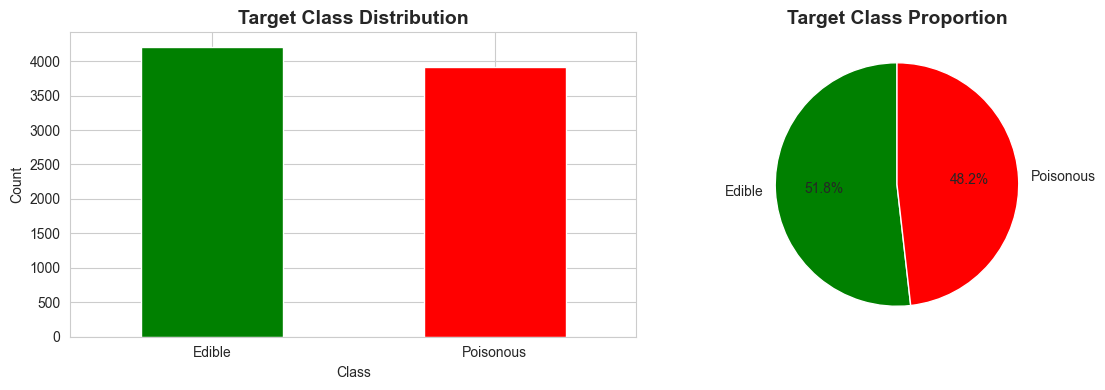


Class Balance Ratio: 0.93
Dataset is well-balanced - no special handling needed.


In [8]:
target_counts = df_mushrooms['class'].value_counts()
target_pct = df_mushrooms['class'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print(f"Edible (e): {target_counts['e']} ({target_pct['e']:.2f}%)")
print(f"Poisonous (p): {target_counts['p']} ({target_pct['p']:.2f}%)")

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

target_counts.plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Target Class Distribution', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Edible', 'Poisonous'], rotation=0)

ax[1].pie(target_counts, labels=['Edible', 'Poisonous'], autopct='%1.1f%%', 
          colors=['green', 'red'], startangle=90)
ax[1].set_title('Target Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

balance_ratio = min(target_pct) / max(target_pct)
print(f"\nClass Balance Ratio: {balance_ratio:.2f}")
if balance_ratio > 0.8:
    print("Dataset is well-balanced - no special handling needed.")
else:
    print("Dataset has class imbalance - consider using stratified sampling or class weights.")

### Impact on Model Selection:
- **Balanced classes** mean accuracy is a reasonable metric
- No need for specialized techniques like SMOTE or class weights
- However, given the safety-critical nature (poisonous mushrooms), we should prioritize **recall for poisonous class** to minimize false negatives

## 5. Feature Distributions and Relationships

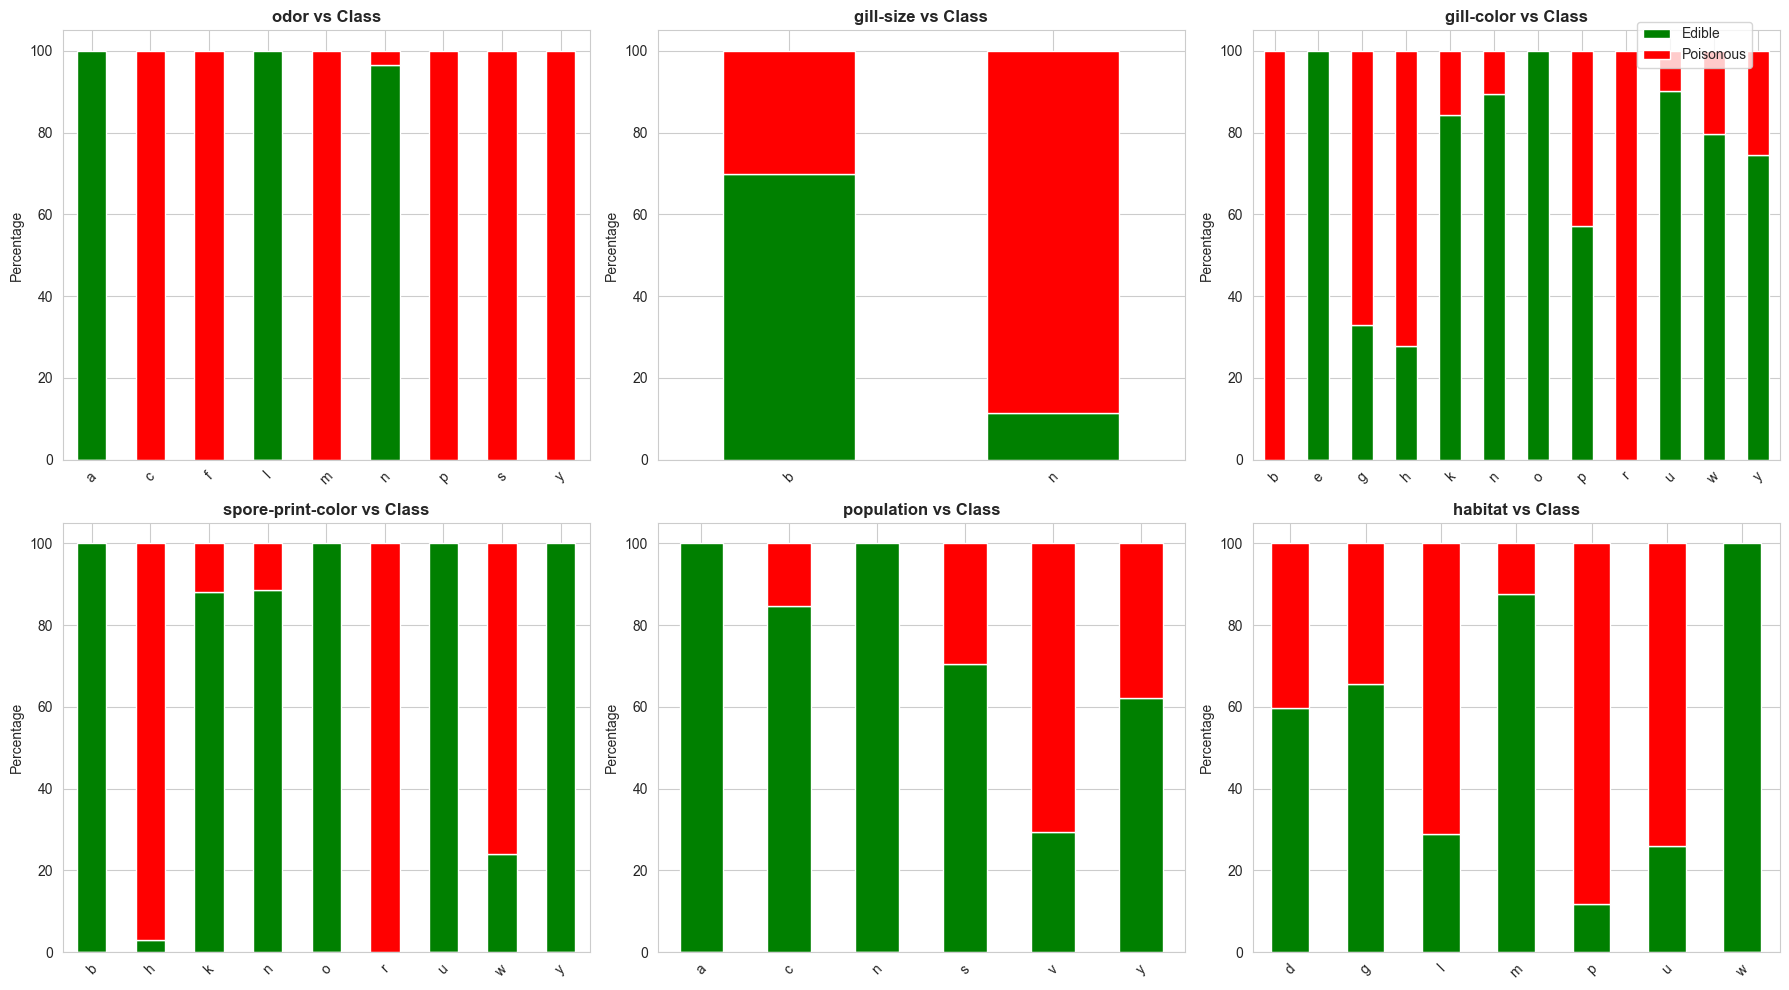

In [9]:
key_features = ['odor', 'gill-size', 'gill-color', 'spore-print-color', 'population', 'habitat']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    ct = pd.crosstab(df_mushrooms[feature], df_mushrooms['class'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=axes[idx], color=['green', 'red'], legend=False)
    axes[idx].set_title(f'{feature} vs Class', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Percentage')
    axes[idx].tick_params(axis='x', rotation=45)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Edible', 'Poisonous'], loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.tight_layout()
plt.show()

### Key Observations:
This visualization helps identify **discriminative features** - those that clearly separate edible from poisonous mushrooms:
- Features where bars are clearly separated (mostly one color) are highly predictive
- Features with mixed colors may have less predictive power
- Understanding these patterns guides feature selection in later stages

## 6. Feature Associations (Cramér's V)

Cramér's V measures association between categorical variables (0 = no association, 1 = perfect association).
This helps us understand:
- Which features are redundant (highly correlated)
- Which features might work well in combination
- Potential multicollinearity issues

C:\Users\lzkol\AppData\Local\Temp\ipykernel_31824\3730129500.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\lzkol\AppData\Local\Temp\ipykernel_31824\3730129500.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\lzkol\AppData\Local\Temp\ipykernel_31824\3730129500.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\lzkol\AppData\Local\Temp\ipykernel_31824\3730129500.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\lzkol\AppData\Local\Temp\ipykernel_31824\3730129500.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\lzkol\AppData\Local\Temp\ipykernel_31824\3730129500.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\l

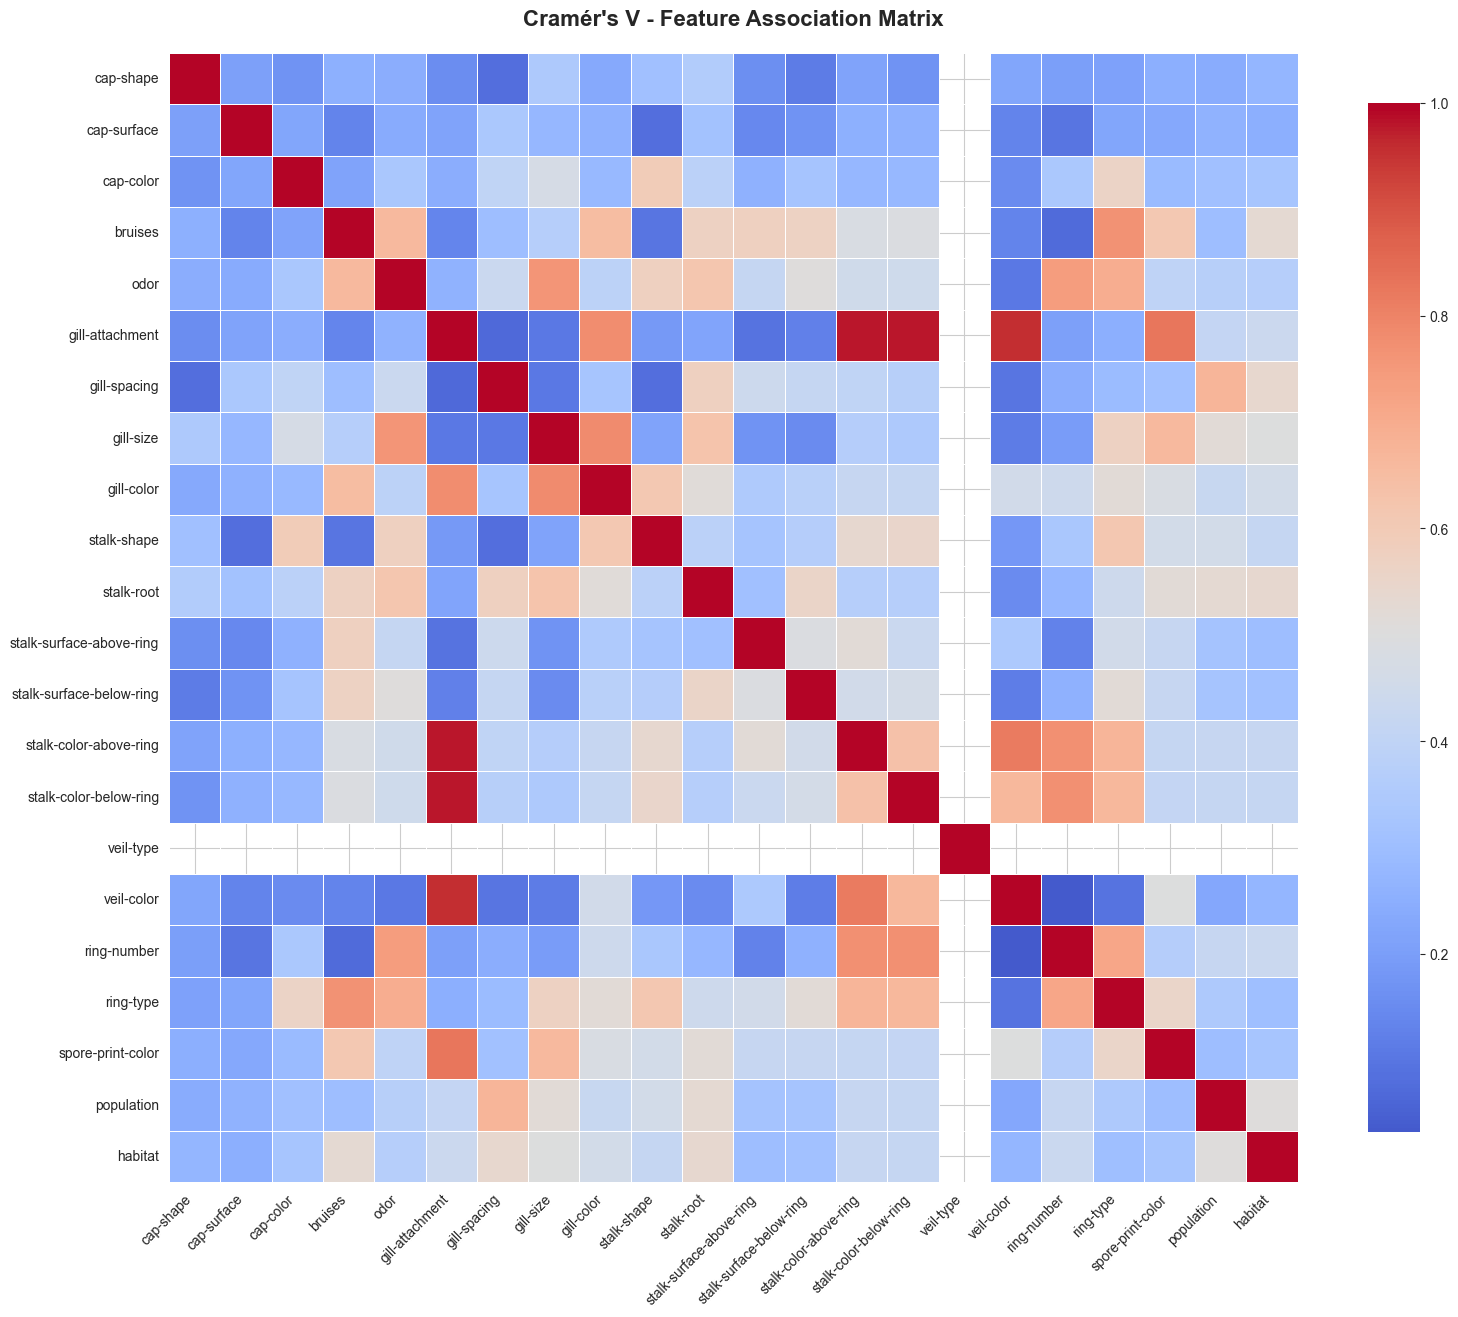


Highly Associated Feature Pairs (Cramér's V > 0.7):
bruises <-> ring-type: 0.768
odor <-> gill-size: 0.761
odor <-> ring-number: 0.743
gill-attachment <-> gill-color: 0.780
gill-attachment <-> stalk-color-above-ring: 0.978
gill-attachment <-> stalk-color-below-ring: 0.978
gill-attachment <-> veil-color: 0.955
gill-attachment <-> spore-print-color: 0.827
gill-size <-> gill-color: 0.784
stalk-color-above-ring <-> veil-color: 0.816
stalk-color-above-ring <-> ring-number: 0.771
stalk-color-below-ring <-> ring-number: 0.772
ring-number <-> ring-type: 0.714


In [13]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

features = df_mushrooms.columns[1:]
cramers_matrix = pd.DataFrame(index=features, columns=features, dtype=float)

for i, feat1 in enumerate(features):
    for j, feat2 in enumerate(features):
        if i == j:
            cramers_matrix.loc[feat1, feat2] = 1.0
        elif pd.isna(cramers_matrix.loc[feat1, feat2]):
            v = cramers_v(df_mushrooms[feat1], df_mushrooms[feat2])
            cramers_matrix.loc[feat1, feat2] = v
            cramers_matrix.loc[feat2, feat1] = v

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(16, 14))
sns.heatmap(cramers_matrix, annot=False, cmap='coolwarm', center=0.5, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Cramér's V - Feature Association Matrix", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nHighly Associated Feature Pairs (Cramér's V > 0.7):")
high_corr = []
for i in range(len(features)):
    for j in range(i+1, len(features)):
        v = cramers_matrix.iloc[i, j]
        if v > 0.7:
            high_corr.append((features[i], features[j], v))
            print(f"{features[i]} <-> {features[j]}: {v:.3f}")

if not high_corr:
    print("No feature pairs with Cramér's V > 0.7")

- Most feature pairs show moderate association (0.2-0.6)
- High association (>0.7) may indicate redundancy - consider dropping one feature
- Low association (<0.2) means features provide independent information

## 7. Feature Importance Preview (using Random Forest)

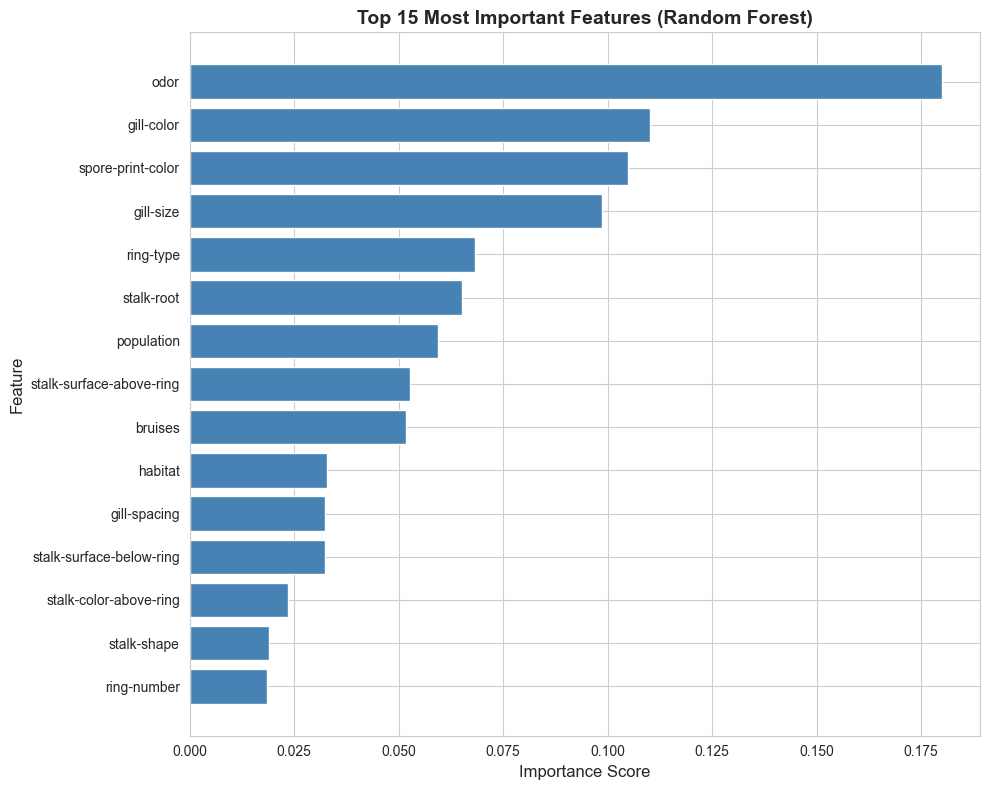


Top 10 Most Important Features:
                 Feature  Importance
                    odor    0.180079
              gill-color    0.110174
       spore-print-color    0.104880
               gill-size    0.098703
               ring-type    0.068237
              stalk-root    0.065057
              population    0.059439
stalk-surface-above-ring    0.052854
                 bruises    0.051703
                 habitat    0.032999


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df_encoded = df_mushrooms.copy()
label_encoders = {}

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'].head(15)[::-1], 
         importance_df['Importance'].head(15)[::-1],
         color='steelblue')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(importance_df.head(10).to_string(index=False))

Interpretation:
- 'odor' is by far the most discriminative feature
- 'spore-print-color', 'gill-size', and 'gill-color' are also highly important
- These insights guide our feature selection in preprocessing

## 8. Summary of Key Insights

### Dataset Characteristics:
- 8,124 samples with 22 categorical features
- All features are nominal/categorical (no numerical features)
- Target variable is well-balanced (~52% edible, 48% poisonous)

### Data Quality Issues & Impact:
1. **Missing Values**: 
   - `stalk-root` has ~30% missing values
   - **Impact**: Requires imputation in preprocessing pipeline, fitted only on training data to prevent data leakage
   
2. **Zero Variance Features**:
   - `veil-type` has only one unique value
   - **Impact**: Should be dropped as it provides no discriminative information
   
3. **Rare Categories**:
   - Some features have categories appearing in <1% of samples
   - **Impact**: May cause issues with train/test split; will use robust encoding with `handle_unknown` parameter

### Discriminative Features:
- **Highly discriminative**: odor, spore-print-color, gill-size, gill-color
- **Moderately discriminative**: ring-type, stalk-root, habitat, population
- **Impact**: These features will likely be selected by feature selection algorithms

### Feature Associations:
- Most feature pairs show moderate association (0.2–0.6)
- No extreme multicollinearity detected
- **Impact**: Features provide complementary information; all may be useful for modeling

### Next Steps:
1. **Preprocessing**: 
   - Handle missing values with mode imputation (fitted on training data only)
   - Use OrdinalEncoder with `handle_unknown='use_encoded_value'` for rare categories
   - Drop zero-variance features
   - Apply variance threshold and feature selection
   
2. **Modeling**:
   - Tree-based models should perform well with categorical data
   - Consider models that handle categories natively (Decision Tree, Random Forest)
   - Use stratified sampling to maintain class balance
   
3. **Evaluation**:
   - Prioritize recall for poisonous class (minimize false negatives)
   - Use confusion matrix to analyze specific error types
   - Consider cost-sensitive learning given safety implications